# Importing Libraries and data sets.

In [1]:
# Importing libaries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import folium
import json
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
# The code below will create a path that will help import the dataframe for analysis.
path_fifa21_new = r'/Users/robertochidiac/Desktop/CareerFoundry Achievement 6/Data/prepared data/fifa21_data_set.csv'

In [4]:
# the code below will import the data
df_fifa21_new = pd.read_csv(os.path.join(path_fifa21_new), index_col = False)

In [6]:
# The code below will show the first five rows of the data frame
df_fifa21_new.head().drop(['Unnamed: 0'], axis = 1)

,short_name,age,dob,height_cm,weight_kg,country,club_name,league_name,overall_performance,potential_performance,value_eur,wage_eur,preferred_foot,weak_foot,release_clause_eur,player_position,team_jersey_number,joined_team,contract_valid_until
0,L. Messi,33,6/24/87,170,72,Argentina,FC Barcelona,Spain Primera Division,93,93,67500000,560000,Left,4,138400000.0,CAM,10.0,7/1/04,2021.0
1,Cristiano Ronaldo,35,2/5/85,187,83,Portugal,Juventus,Italian Serie A,92,92,46000000,220000,Right,4,75900000.0,LS,7.0,7/10/18,2022.0
2,J. Oblak,27,1/7/93,188,87,Slovenia,Atlético Madrid,Spain Primera Division,91,93,75000000,125000,Right,3,159400000.0,GK,13.0,7/16/14,2023.0
3,R. Lewandowski,31,8/21/88,184,80,Poland,FC Bayern München,German 1. Bundesliga,91,91,80000000,240000,Right,4,132000000.0,ST,9.0,7/1/14,2023.0
4,Neymar Jr,28,2/5/92,175,68,Brazil,Paris Saint-Germain,French Ligue 1,91,91,90000000,270000,Right,5,166500000.0,LW,10.0,8/3/17,2022.0


### The data we have above is the cleaned version we had from the previous assignment.

# Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.

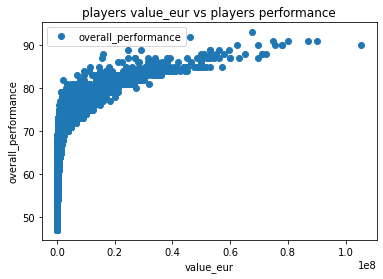

In [25]:
# The data below will create a scatterplot using matplotlib showing the relationship between the variables 'value_eur' and 'release_clause_eur'.
df_fifa21_new.plot(x = 'value_eur', y = 'overall_performance', style ='o')
plt.title('players value_eur vs players performance')
plt.xlabel('value_eur')
plt.ylabel('overall_performance')
plt.show()

# State your hypothesis in a markdown cell within your Jupyter notebook.

### The hypothesis I will define at this point giving the scatterplot is that: as the value for the player increase so does his performance.

# Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

In [26]:
# The code below will reshape the variables into numpy arrays and put them in X and y object respectively.
X = df_fifa21_new['value_eur'].values.reshape(-1,1)
y = df_fifa21_new['overall_performance'].values.reshape(-1,1)

In [27]:
X

array([[67500000],
       [46000000],
       [75000000],
       ...,
       [   35000],
       [   40000],
       [   30000]])

In [28]:
y

array([[93],
       [92],
       [91],
       ...,
       [47],
       [47],
       [47]])

# Split the data into two sets: a training set and a test set.

In [29]:
# The code below will split the data into training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Run a linear regression on the data.

In [30]:
# To start the regresssion analysis we will run the code below, which will create the regression object.
regression = LinearRegression()

# Fit the model you created to the training set.

In [31]:
# The code below will fit the regression object createed above into the training set.
regression.fit(X_train, y_train)

LinearRegression()

# Create a prediction for y on the test set.

In [32]:
# The code below will give us a prediction of the value of y using the x_test.
y_predicted = regression.predict(X_test)

# Create a plot that shows the regression line on the test set.

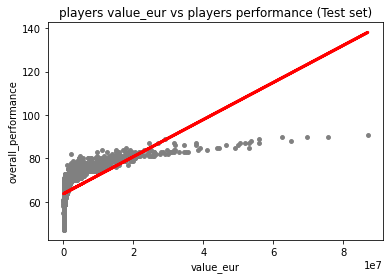

In [38]:
# The code below will create the plot that will show the regression line for the test set
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('players value_eur vs players performance (Test set)')
plot_test.xlabel('value_eur')
plot_test.ylabel('overall_performance')
plot_test.show()

# Write your own interpretation of how well the line appears to fit the data in a markdown cell.

### At first glnace at the plot above we can see that there is a weak positive relationship between the two variables, and that some of the points seems to be concentrated at the beginning. Then the slopes flattens and the data points are not arround the line anymore. It doesn't seems to be a great fit.

# Check the model performance statistics—MSE and R2.

In [34]:
# The codes below will create the object that will contain and show us the performance statistics of the data.
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [35]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[8.55034722e-07]]
Mean squared error:  29.019242289719305
R2 score:  0.412836815024644


# Compare the predicted y values with the actual y values in a dataframe.

In [36]:
# The code below will create a dataframe that will allow us to compare the actual y values with thee predicted y values.
data_fifa21 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data_fifa21.head(20)


,Actual,Predicted
0,74,68.402901
1,60,63.935345
2,67,64.255983
3,49,63.742962
4,64,64.213231
5,60,63.854116
6,70,65.324776
7,51,63.742962
8,58,63.819915
9,65,63.978096


# Include your thoughts on how well the model performed on the test set in a markdown cell.

### We can clearly see that the model doesn't do a great job at explaining the relationship between the players' value in euro and the players' overall performance. We can see that the data points don't follow the regression line, giving us an indication that the relationship between these two varaibles can't be explained by a regression model. To further amphasize that, we can see that the R2 score is also relatively low telling us that the relationship is not a great fit either. Another fact pointing at the model not doing a great job at explaining the relationship between the two variables is the difference in values between the actual and predicted y values.